In [1]:
import pandas as pd
import os, sys
import toml
sys.path.append(os.path.join(os.getcwd(),r'..\..\..'))
sum_config = toml.load(os.path.join(os.getcwd(),r'../../../configuration/summary_configuration.toml'))
# from settings import comparison_dict

In [2]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in sum_config['comparison_dict'].items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [3]:
geog = 'poc'
geog_col = 'hh_poc'

# Population

In [4]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Persons')

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"3,221,739","3,221,739","3,221,739"
1,"818,274","818,274","818,274"


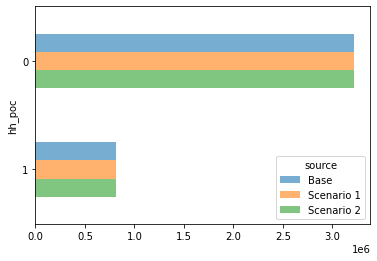

In [5]:
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Employment

In [6]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Workers')
df

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"1,616,877","1,616,877","1,616,877"
1,"401,707","401,707","401,707"


# Transit Ridership

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"334,044","334,044","334,044"
1,"136,115","136,115","136,115"


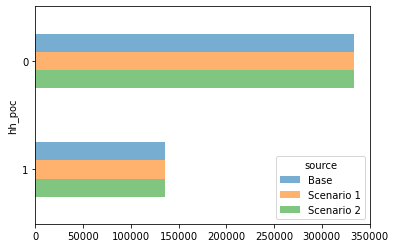

In [7]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## Transit Commute Mode Share

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,5.4%,5.4%,5.4%
1,7.9%,7.9%,7.9%


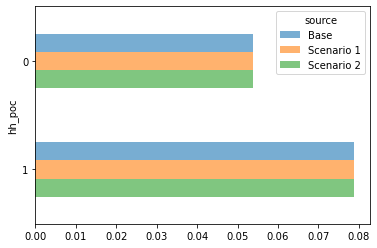

In [8]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"56,845,052","56,845,052","56,845,052"
1,"11,656,692","11,656,692","11,656,692"
Total,"68,501,744","68,501,744","68,501,744"


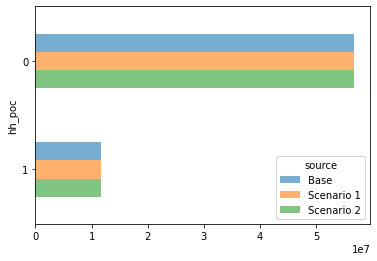

In [9]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"56,845,052","56,845,052","56,845,052"
1,"11,656,692","11,656,692","11,656,692"
Total,"68,501,744","68,501,744","68,501,744"


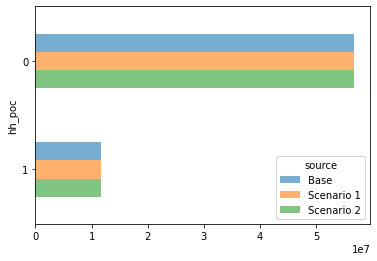

In [10]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

# Delay
**Total Delay Hours per Day**

source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,"268,798","268,798","268,798"
1,"58,487","58,487","58,487"
Total,"327,285","327,285","327,285"


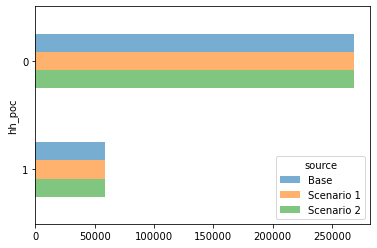

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Total Delay Hours')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

**Delay Hours per Household**


source,Base,Scenario 1,Scenario 2
hh_poc,,,
0,12.5,12.5,12.5
1,11.2,11.2,11.2
Total,23.7,23.7,23.7


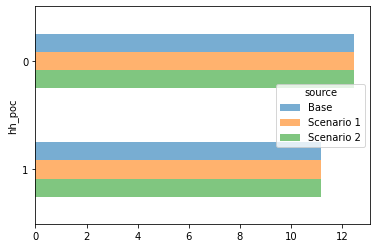

In [12]:
pd.options.display.float_format = '{:0,.1f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', 
                    aggfunc='sum', values='Avg. Minutes of Delay per Household')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df